In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [11]:
df = pd.read_csv('D:/data/Movies_collection.csv', header=0)

In [12]:
df.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,2.266667
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0,2.106667
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1,2.980000
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0,2.893333
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0,3.080000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  3D_available         506 non-null    int

In [13]:
X = df.drop("Collection",axis=1)
y = df['Collection']

In [14]:
X.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [15]:
y.head()

0    2.266667
1    2.106667
2    2.980000
3    2.893333
4    3.080000
Name: Collection, dtype: float64

In [34]:
X.shape

(506, 19)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [18]:
X_train_full.shape

(379, 19)

In [19]:
y_train_full.shape

(379,)

In [47]:
X_test.shape

(127, 19)

In [21]:
X_valid.shape

(95, 19)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_vaild = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
X_train.shape

(284, 19)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=[19]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [36]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(learning_rate=1e-2),
             metrics=['mae'])

In [37]:
model_history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
9/9 [==============================] - 1s 28ms/step - loss: 2.5285 - mae: 1.3279 - val_loss: 14599201792.0000 - val_mae: 119477.4141
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7139 - mae: 0.6782 - val_loss: 28317313024.0000 - val_mae: 166427.2188
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4843 - mae: 0.5515 - val_loss: 37445947392.0000 - val_mae: 191416.0156
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3464 - mae: 0.4636 - val_loss: 45121130496.0000 - val_mae: 210128.1719
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2676 - mae: 0.4061 - val_loss: 50544123904.0000 - val_mae: 222402.3750
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2160 - mae: 0.3684 - val_loss: 57351700480.0000 - val_mae: 236909.7969
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1851 - mae: 0.3387 - val_loss: 62822543360.0000 - val_mae: 247

In [38]:
model_history.history

{'loss': [2.5284602642059326,
  0.7139418125152588,
  0.4842914640903473,
  0.34635990858078003,
  0.267643541097641,
  0.21603284776210785,
  0.18512102961540222,
  0.16233853995800018,
  0.15091145038604736,
  0.13807661831378937,
  0.1302364617586136,
  0.12368123978376389,
  0.1171722263097763,
  0.11138688772916794,
  0.10689836740493774,
  0.10397566854953766,
  0.10069852322340012,
  0.09733182191848755,
  0.0954190269112587,
  0.092707559466362,
  0.08969397842884064,
  0.08849052339792252,
  0.08594265580177307,
  0.08498173207044601,
  0.08305568248033524,
  0.08130756765604019,
  0.08085376769304276,
  0.07938729226589203,
  0.07810497283935547,
  0.07670599222183228,
  0.07481327652931213,
  0.0750819593667984,
  0.07310353219509125,
  0.07217758148908615,
  0.07159817218780518,
  0.06986813992261887,
  0.06974907219409943,
  0.06824781745672226,
  0.06752489507198334,
  0.06704027205705643,
  0.06669284403324127,
  0.06537880748510361,
  0.06602878123521805,
  0.0645563006

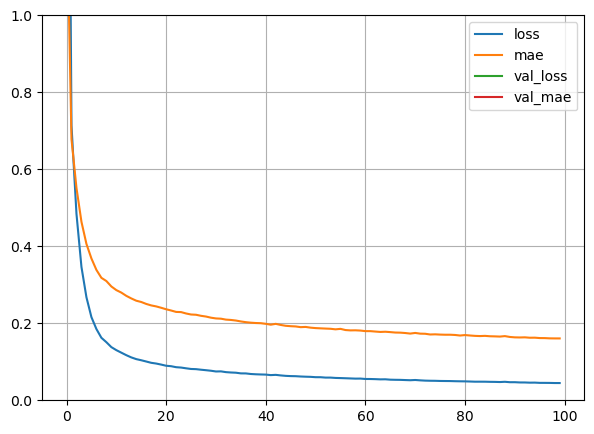

In [39]:
pd.DataFrame(model_history.history).plot(figsize=(7,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
X_new = X_test[:5]

In [45]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:5])

1/1 [==============================] - 0s 14ms/step
[[259225.88]
 [282674.78]
 [213080.44]
 [276529.75]
 [228958.66]]
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000
Name: Collection, dtype: float64
